In [1]:
import graphviz

In [2]:
def drawGraph(graph):
    dot = graphviz.Digraph()
    # Nodes
    for _, node in graph.items():
        dot.node(str(node['id']),str(node['id']),style='filled',fontcolor='white',fillcolor=node['color'])

    # Edges
    for _, node in graph.items():
        for parent in node['parents']:
            dot.edge(str(node['id']), str(parent))
    return dot

In [3]:
def searchRegression(graph, init_node):
    paths = []
    candidates = []
    visited = []
    queue = []   

    visited.append(init_node)
    queue.append(init_node)

    while queue:
        node = queue.pop()  

        successParents = True
        parents = graph[node['id']]['parents']
        failed_parent = False

        for parent_hash in parents:
            if parent_hash not in graph:
                successParents = False
                if len(queue)==0:
                    break
                else: 
                    continue # Check other branches
            parent = graph[parent_hash]
            successParent = parent['color'] == "green"
            successParents = successParents and successParent
            if not successParent:
                if parent['color'] in ["black"]:
                    candidates.append(node)
                elif parent['color'] == "red":
                    failed_parent = True
                if parent_hash not in visited:
                    visited.append(parent_hash)
                    queue.append(parent)
        
        if failed_parent: candidates = []
    
        if successParents and node['color'] != "green":
            
            if node['color'] == 'TestFail': 
                return [node]
            else:
                candidates = candidates + [node]
                if len(queue)==0:
                    return candidates
                else:
                    paths.append(candidates)
    
    if len(paths) > 0: return paths[0]
    return []

### Example 1 - Basic Regression

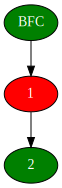

In [4]:
graph = {
       'BFC': { 'id': 'BFC', 'color': 'green', 'parents': [1]},
       1: { 'id': 1, 'color': 'red', 'parents': [2]},
       2: { 'id': 2, 'color': 'green', 'parents': []}
}
drawGraph(graph)

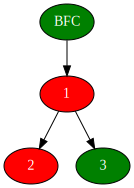

In [12]:
graph = {
      'BFC': { 'id': 'BFC', 'color': 'green', 'parents': [1]},
       1: { 'id': 1, 'color': 'red', 'parents': [2, 3]},
       2: { 'id': 2, 'color': 'red', 'parents': []},
       3: { 'id': 3, 'color': 'green', 'parents': []}
}
drawGraph(graph)

### Example 2 - Regresion with 2 parents (both green)

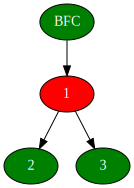

In [5]:
graph = {
      'BFC': { 'id': 'BFC', 'color': 'green', 'parents': [1]},
       1: { 'id': 1, 'color': 'red', 'parents': [2, 3]},
       2: { 'id': 2, 'color': 'green', 'parents': []},
       3: { 'id': 3, 'color': 'green', 'parents': []}
}
drawGraph(graph)

### Example 3 - Regresion with 2 parents (1 red, 1 green)

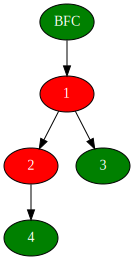

In [6]:
graph = {
       'BFC': { 'id': 'BFC', 'color': 'green', 'parents': [1]},
       1: { 'id': 1, 'color': 'red', 'parents': [2, 3]},
       2: { 'id': 2, 'color': 'red', 'parents': [4]},
       3: { 'id': 3, 'color': 'green', 'parents': []},
       4: { 'id': 4, 'color': 'green', 'parents': []}
}
drawGraph(graph)

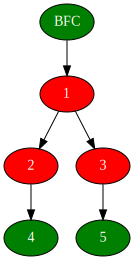

In [13]:
graph = {
       'BFC': { 'id': 'BFC', 'color': 'green', 'parents': [1]},
       1: { 'id': 1, 'color': 'red', 'parents': [2, 3]},
       2: { 'id': 2, 'color': 'red', 'parents': [4]},
       3: { 'id': 3, 'color': 'red', 'parents': [5]},
       4: { 'id': 4, 'color': 'green', 'parents': []},
       5: { 'id': 5, 'color': 'green', 'parents': []}
}
drawGraph(graph)

## Example 4 - Regresion with 2 parents (2 red)

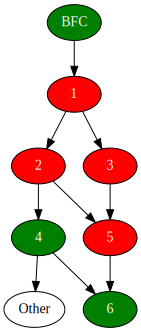

In [7]:
graph = {
       'BFC': { 'id': 'BFC', 'color': 'green', 'parents': [1]},
       1: { 'id': 1, 'color': 'red', 'parents': [2, 3]},
       2: { 'id': 2, 'color': 'red', 'parents': [4, 5]},
       3: { 'id': 3, 'color': 'red', 'parents': [5]},
       4: { 'id': 4, 'color': 'green', 'parents': [6, 'Other']},
       5: { 'id': 5, 'color': 'red', 'parents': [6]},
       6: { 'id': 6, 'color': 'green', 'parents': []}
}
drawGraph(graph)

## Example 5 - Basic Regresion with no clear BIC

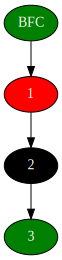

In [8]:
graph = {
       'BFC': { 'id': 'BFC', 'color': 'green', 'parents': [1]},
       1: { 'id': 1, 'color': 'red', 'parents': [2]},
       2: { 'id': 2, 'color': 'black', 'parents': [3]},
       3: { 'id': 3, 'color': 'green', 'parents': []}
}
drawGraph(graph)

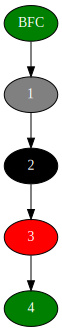

In [19]:
graph = {
       'BFC': { 'id': 'BFC', 'color': 'green', 'parents': [1]},
       1: { 'id': 1, 'color': 'grey', 'parents': [2]},
       2: { 'id': 2, 'color': 'black', 'parents': [3]},
       3: { 'id': 3, 'color': 'red', 'parents': [4]},
       4: { 'id': 4, 'color': 'green', 'parents': []}
}
drawGraph(graph)

### Example 6 - Regresion with no clear BIC - 2 parents (1 black, 1 green)

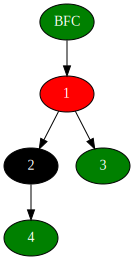

In [9]:
graph = {
       'BFC': { 'id': 'BFC', 'color': 'green', 'parents': [1]},
       1: { 'id': 1, 'color': 'red', 'parents': [2, 3]},
       2: { 'id': 2, 'color': 'black', 'parents': [4]},
       3: { 'id': 3, 'color': 'green', 'parents': []},
       4: { 'id': 4, 'color': 'green', 'parents': []}
}
drawGraph(graph)

### Example 7 - Regresion with no clear BIC - 2 parents (1 red, 1 green)

[{'id': 3, 'color': 'red', 'parents': [5]}, {'id': 5, 'color': 'black', 'parents': [6]}, {'id': 2, 'color': 'black', 'parents': [4, 5]}]


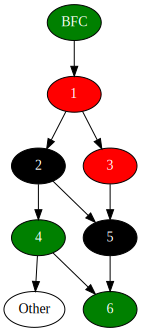

In [10]:
graph = {
       'BFC': { 'id': 'BFC', 'color': 'green', 'parents': [1]},
       1: { 'id': 1, 'color': 'red', 'parents': [2, 3]},
       2: { 'id': 2, 'color': 'black', 'parents': [4, 5]},
       3: { 'id': 3, 'color': 'red', 'parents': [5]},
       4: { 'id': 4, 'color': 'green', 'parents': [6, 'Other']},
       5: { 'id': 5, 'color': 'black', 'parents': [6]},
       6: { 'id': 6, 'color': 'green', 'parents': []}
}

print(searchRegression(graph, graph['BFC']))

drawGraph(graph)